# Université Paul Sabatier
**Etudiant : BERQUEZ Léa** 

EMIND1G1 - Fondements de la recherche d'information

**TP 4**

Enseignant : José G. Moreno


2020

## TP 4. PageRank

Une méthode récente pour organiser les résultats avec des informations sur la structure de la Web est connue comme PageRank. Il se base dans les liens entrant et sortants des pages Web pour calculer l’importance de chaque page. 
Dans ce TP , nous allons utiliser les liens entrants et sortants sur la Wikipédia pour calculer avec PageRank l’importance de chaque page Wikipédia.

### 1. Le code
Explorez et exécutez le code ci-dessous :

In [1]:
import numpy as np
import networkx as nx
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt
%matplotlib inline

def pageRank(G, s = .85, maxerr = .0001):
    """
    Computes the pagerank for each of the n states

    Parameters
    ----------
    G: matrix representing state transitions
       Gij is a binary value representing a transition from state i to j.

    s: probability of following a transition. 1-s probability of teleporting
       to another state.

    maxerr: if the sum of pageranks between iterations is bellow this we will
            have converged.
    """
    n = G.shape[0]

    # transform G into markov matrix A
    A = csc_matrix(G,dtype=np.float)
    rsums = np.array(A.sum(1))[:,0]
    ri, ci = A.nonzero()
    A.data /= rsums[ri]

    # bool array of sink states
    sink = rsums==0
    j = 0 
    # Compute pagerank r until we converge
    ro, r = np.zeros(n), np.ones(n)
    while np.sum(np.abs(r-ro)) > maxerr: 
        j = j + 1 
        ro = r.copy()
        # calculate each pagerank at a time
        for i in range(n):
            # inlinks of state i
            Ai = np.array(A[:,i].todense())[:,0]
            # account for sink states
            Di = sink / float(n)
            # account for teleportation to state i
            Ei = np.ones(n) / float(n)

            r[i] = ro.dot( Ai*s + Di*s + Ei*(1-s) )

    print("Nombre d'itérations : " + str(j) + ".\n")
    # return normalized pagerank
    return r/float(sum(r))

In [2]:
# Example extracted from 'Introduction to Information Retrieval'
G = np.array([[0,0,1,0,0,0,0],
                  [0,1,1,0,0,0,0],
                  [1,0,1,1,0,0,0],
                  [0,0,0,1,1,0,0],
                  [0,0,0,0,0,0,1],
                  [0,0,0,0,0,1,1],
                  [0,0,0,1,1,0,1]])

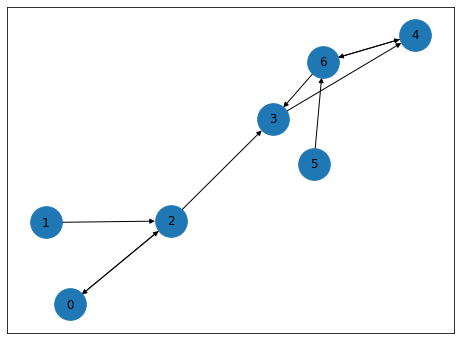

In [3]:
nxG = nx.from_numpy_matrix(G, create_using=nx.DiGraph())
fig, ax = plt.subplots(1, 1, figsize=(8, 6));
nx.draw_networkx(nxG, ax=ax,  node_size = 1000)

In [4]:
print([(i,x) for i,x in enumerate(pageRank(G,s=.86))])

Nombre d'itérations : 419.

[(0, 0.12727557265183953), (1, 0.03616954117667246), (2, 0.12221593935467938), (3, 0.2260845242374078), (4, 0.289344118485507), (5, 0.03616954117667246), (6, 0.16274076291722134)]


### 2. Questions candides
**Comprenez-vous le code ? Combiens des nœuds/pages sont utilisez ? Combiens des itérations ?** 

Le code permet de calculer le PageRank. Il y a plusieurs itérations pour permettre de trouver la bonne valeur. Le pageRank c'est la probabilité qu'une personne en cliquant au hasard sur des liens arrive à une page particulière. 

Il y a 7 pages/noeud dans l'exemple précédent. 
Il y a 419 itérations avec l'exemple précédent. On itère jusqu'à ce que l'on converge. 


### 3. Identifiants simplewiki
Téléchargez le fichier sur le pages de simplewiki qui contient les identifiants de pages Wikipédia. À l'aide de pandas transformez-le dans le format suivant. Ci-dessous vous trouverez un code example.

|             Id                 	|       Title        	|
|------------------------------	|---------------	|
|2|	August	|
|3|	Angela	|
|4|	Angela	|
|5|	Anthere	|
|6|	Art	|
|8|	A	|
|9|	Air	|
|11|	Administrators	|
|12|	Autonomous_communities_of_Spain	|
|13|	Alan_Turing	|

La première colonne est l’identifiant et la deuxième le titre.

In [5]:
import pandas as pd
from scipy.sparse import csc_matrix
import networkx as nx

In [6]:
!wget https://dumps.wikimedia.org/simplewiki/20200901/simplewiki-20200901-page.sql.gz
!gzip -d simplewiki-20200901-page.sql.gz


--2020-11-01 09:06:27--  https://dumps.wikimedia.org/simplewiki/20200901/simplewiki-20200901-page.sql.gz
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.7, 2620:0:861:1:208:80:154:7
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19423642 (19M) [application/octet-stream]
Saving to: ‘simplewiki-20200901-page.sql.gz’

simplewiki-20200901 100%[===================>]  18.52M  4.46MB/s    in 4.0s    

2020-11-01 09:06:31 (4.66 MB/s) - ‘simplewiki-20200901-page.sql.gz’ saved [19423642/19423642]



Affichage de tout : 

In [7]:
!cat simplewiki-20200901-page.sql | sed 's|VALUES (|\n(|' | sed 's|),(|)\n(|g' | grep '^(' | awk -F ",'" '{$2=substr($2, 1, length($2)-1);split($1,a,",");b=substr(a[1], 2, length(a[1]));print b"\t"$2}' > simplewiki-20200901-page.csv
dfpages = pd.read_csv('simplewiki-20200901-page.csv', sep='\t', header=None)
dfpages.columns = ['Id', 'title']
dfpages

,Id,title
0,1,April
1,2,August
2,3,Angela
3,4,Angela
4,5,Anthere
...,...,...
574030,786984,France_Squad_2002_World_Cup
574031,786985,France_Squad_2002_World_Cup
574032,786986,France_Squad_1982_World_Cup
574033,786987,France_Squad_1978_World_Cup


Affichage seulement comme l'exemple :

In [8]:
!cat simplewiki-20200901-page.sql | sed 's|VALUES (|\n(|' | sed 's|),(|)\n(|g' | grep '^(' | awk -F ",'" '{$2=substr($2, 1, length($2)-1);split($1,a,",");b=substr(a[1], 2, length(a[1]));print b"\t"$2}' > simplewiki-20200901-page.csv
dfpages = pd.read_csv('simplewiki-20200901-page.csv', sep='\t', header=None)
dfpages.columns = ['Id', 'title']
dfpages.head(11).tail(10)

,Id,title
1,2,August
2,3,Angela
3,4,Angela
4,5,Anthere
5,6,Art
6,8,A
7,9,Air
8,11,Administrators
9,12,Autonomous_communities_of_Spain
10,13,Alan_Turing


### 4. Matrice d'adjacence
Parmi les fichier disponibles sur la Wikipédia, il existe le fichier simplewiki-20200901-pagelinks. Il contient tous les links de chaque page Wikipédia vers une autre page Wikipédia. Cette information peut être utilisé pour construir le graphe d'interconection entre pages Wikipédia. Voici un extait du fichier: 

| PageLink_from 	| PageLink_namespace 	| PageLink_title                          	| PageLink_from_namespace 	|
|---------------	|-----------	|--------------------------------	|----------------	|
|         88452 	|         0 	|                          '!!!' 	|              0 	|
|        136329 	|         0 	| '!!!Fuck_You!!!_and_Then_Some' 	|              0 	|
|        473210 	|         0 	|                       '!Bang!' 	|              0 	|

Utilize le code ci-dessous pour construir une matrice d'adjacence. Utlisez un format creuse, c'est-à-dire, chaque ligne doit contenir deux identifients de noeud et indiquer un lien existant. Le premier est le noeud de départ et le deuxième le noeud d'arrivé. Ce code est un example. Essayez de l'améliorer pour faire un calcule exact.

In [9]:
!wget https://dumps.wikimedia.org/simplewiki/20200901/simplewiki-20200901-pagelinks.sql.gz
!gzip -d simplewiki-20200901-pagelinks.sql.gz

--2020-11-01 09:06:35--  https://dumps.wikimedia.org/simplewiki/20200901/simplewiki-20200901-pagelinks.sql.gz
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.7, 2620:0:861:1:208:80:154:7
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60446900 (58M) [application/octet-stream]
Saving to: ‘simplewiki-20200901-pagelinks.sql.gz’

simplewiki-20200901 100%[===================>]  57.65M  4.59MB/s    in 13s     

2020-11-01 09:06:48 (4.57 MB/s) - ‘simplewiki-20200901-pagelinks.sql.gz’ saved [60446900/60446900]



In [10]:
!cat simplewiki-20200901-pagelinks.sql | sed 's|VALUES (|\n(|' | sed 's|),(|)\n(|g' | grep '^('  > simplewiki-20200901-pagelinks.csv

In [11]:
#netoyage pour lire le fichier avec pandas 
with open('simplewiki-20200901-pagelinks.csv', "r") as fin, open('simplewiki-20200901-pagelinks_escaped.csv', "w") as fout:
  for line in fin.readlines():
    parts = line.split(",")
    line = "\t".join([parts[0][1:]]+[parts[1]]+[",".join(parts[2:len(parts)-1])]+[parts[len(parts)-1][:-2]])
    fout.write(line+"\n")


In [12]:
dflinks = pd.read_csv('simplewiki-20200901-pagelinks_escaped.csv', sep='\t', header=None)
dflinks

,0,1,2,3
0,88452,0,'!!!',0
1,136329,0,'!!!Fuck_You!!!_and_Then_Some',0
2,473210,0,'!Bang!',0
3,118267,0,'!Genesis',0
4,266430,0,'!Hero',0
...,...,...,...,...
12219667,422039,14,'Pages_translated_from_English_Wikipedia',829
12219668,422039,828,'BaseConvert',829
12219669,417250,828,'Convert',829
12219670,417250,829,'Convert/Archive_1',829


In [13]:
dddfpages = {k:v for v,k in dfpages[['Id','title']].values}

In [14]:
dflinks['idB'] = dflinks.apply(lambda row: dddfpages[row[2][1:-1]] if row[2][1:-1] in dddfpages else -1, axis = 1) 
dflinks

,0,1,2,3,idB
0,88452,0,'!!!',0,430146
1,136329,0,'!!!Fuck_You!!!_and_Then_Some',0,-1
2,473210,0,'!Bang!',0,-1
3,118267,0,'!Genesis',0,-1
4,266430,0,'!Hero',0,-1
...,...,...,...,...,...
12219667,422039,14,'Pages_translated_from_English_Wikipedia',829,622667
12219668,422039,828,'BaseConvert',829,422039
12219669,417250,828,'Convert',829,417250
12219670,417250,829,'Convert/Archive_1',829,-1


In [15]:
dflinks2 = dflinks[dflinks['idB']>0][[0,'idB']]
dflinks2

,0,idB
0,88452,430146
9,188948,275706
21,51061,771632
22,342912,771632
23,479624,771632
...,...,...
12219665,417250,200327
12219666,422039,700265
12219667,422039,622667
12219668,422039,422039


In [16]:
A = csc_matrix(([1 for x in range(len(dflinks2))], ([x for x in dflinks2[0].values], [x for x in dflinks2['idB'].values])), shape=(max(dflinks2.max().values)+1, max(dflinks2.max().values)+1))

### 6. PageRank pour la Wikipédia
En utilisant le fichier de sorti dans le point 4, voici le code pour calculer les PageRanks des pages Wikipédia (les paramètres ont été choisis pour empêcher de problèmes de mémoire RAM).

In [17]:
nxG = nx.from_scipy_sparse_matrix(A, create_using=nx.DiGraph())

In [18]:
pr = nx.pagerank(nxG, alpha=0.9,max_iter=10,weight=None,tol=1e-02)

In [19]:
pr

{0: 5.338826185664627e-07,
 1: 5.338826185664627e-07,
 2: 5.338826185664627e-07,
 3: 5.338826185664627e-07,
 4: 5.338826185664627e-07,
 5: 5.338826185664627e-07,
 6: 5.338826185664627e-07,
 7: 5.338826185664627e-07,
 8: 5.338826185664627e-07,
 9: 5.338826185664627e-07,
 10: 5.338826185664627e-07,
 11: 5.338826185664627e-07,
 12: 5.338826185664627e-07,
 13: 5.338826185664627e-07,
 14: 5.338826185664627e-07,
 15: 5.338826185664627e-07,
 16: 5.338826185664627e-07,
 17: 5.338826185664627e-07,
 18: 8.603282117184521e-07,
 19: 5.338826185664627e-07,
 20: 2.152943729874865e-06,
 21: 5.338826185664627e-07,
 22: 5.338826185664627e-07,
 23: 5.338826185664627e-07,
 24: 5.647907053685964e-07,
 25: 5.338826185664627e-07,
 26: 5.338826185664627e-07,
 27: 5.338826185664627e-07,
 28: 5.338826185664627e-07,
 29: 2.3260114792652717e-05,
 30: 1.5054202991740454e-06,
 31: 5.338826185664627e-07,
 32: 5.338826185664627e-07,
 33: 5.338826185664627e-07,
 34: 6.155682765435301e-07,
 35: 5.338826185664627e-07,


###Test des pageRank sur mon système

####Mise en place de l'index 

In [20]:
# déclaration de la variable JAVA_HOME
import os
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-11-openjdk-amd64'
!export JAVA_HOME=/usr/lib/jvm/java-11-openjdk-amd64

In [21]:
#installation de pyterrier avec pip
!pip install --upgrade git+https://github.com/terrier-org/pyterrier.git#egg=python-terrier

  Cloning https://github.com/terrier-org/pyterrier.git to /tmp/pip-install-ocpk727x/python-terrier
  Running command git clone -q https://github.com/terrier-org/pyterrier.git /tmp/pip-install-ocpk727x/python-terrier
     |████████████████████████████████| 1.1MB 4.7MB/s 
     |████████████████████████████████| 71kB 6.6MB/s 
  Created wheel for python-terrier: filename=python_terrier-0.3.0.dev0-cp36-none-any.whl size=54092 sha256=1b8120e4c44fc8ffcb1d4a16e76dec0ec9b526e76512fd54a73d2a40dc5bd287
  Stored in directory: /tmp/pip-ephem-wheel-cache-phi6kxc2/wheels/cc/bb/69/836d846a92c787b35ca6478119c0033762ab2b95d866eeb288
  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=710ac2217924f7e8559fa2b40e1fe7f739b4f4fc651d97d430eb7dea1988f147
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
  Created wheel for pytrec-eval: filename=pytrec_eval-0.5-cp36-cp36m-linux_x86_64.whl size=265322 sha256=f12b7e3aa4f1a86efb531

In [22]:
#Initialization de JVM
import pyterrier as pt
if not pt.started():
  pt.init() 

terrier-assemblies 5.3  jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.4  jar not found, downloading to /root/.pyterrier...
Done


In [23]:
!wget https://dumps.wikimedia.org/simplewiki/20200901/simplewiki-20200901-abstract.xml.gz

--2020-11-01 09:12:48--  https://dumps.wikimedia.org/simplewiki/20200901/simplewiki-20200901-abstract.xml.gz
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.7, 2620:0:861:1:208:80:154:7
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15445414 (15M) [application/octet-stream]
Saving to: ‘simplewiki-20200901-abstract.xml.gz’

simplewiki-20200901 100%[===================>]  14.73M  4.68MB/s    in 3.1s    

2020-11-01 09:12:52 (4.68 MB/s) - ‘simplewiki-20200901-abstract.xml.gz’ saved [15445414/15445414]



In [24]:
!gzip -d simplewiki-20200901-abstract.xml.gz #Décompresse le fichier   

In [25]:
import pandas as pd
import xml.etree.ElementTree as et

def parse_XML(xml_file, df_cols): 
    """Parse the input XML file and store the result in a pandas 
    DataFrame with the given columns. 
    
    The first element of df_cols is supposed to be the identifier 
    variable, which is an attribute of each node element in the 
    XML data; other features will be parsed from the text content 
    of each sub-element. 
    """
    
    xtree = et.parse(xml_file)
    xroot = xtree.getroot()
    rows = []
    
    for node in xroot: 
        res = []
        for el in df_cols[0:]: 
            if node is not None and node.find(el) is not None:
                res.append(node.find(el).text)
            else: 
                res.append(None)
        rows.append({df_cols[i]: res[i] 
                     for i, _ in enumerate(df_cols)})
    
    out_df = pd.DataFrame(rows, columns=df_cols)
        
    return out_df 

In [26]:
!head -50 simplewiki-20200901-abstract.xml 

<feed>
<doc>
<title>Wikipedia: April</title>
<url>https://simple.wikipedia.org/wiki/April</url>
<abstract>April is the fourth month of the year, and comes between March and May. It is one of four months to have 30 days.</abstract>
<links>
<sublink linktype="nav"><anchor>The Month</anchor><link>https://simple.wikipedia.org/wiki/April#The_Month</link></sublink>
<sublink linktype="nav"><anchor>April in poetry</anchor><link>https://simple.wikipedia.org/wiki/April#April_in_poetry</link></sublink>
<sublink linktype="nav"><anchor>Events in April</anchor><link>https://simple.wikipedia.org/wiki/April#Events_in_April</link></sublink>
<sublink linktype="nav"><anchor>Fixed Events</anchor><link>https://simple.wikipedia.org/wiki/April#Fixed_Events</link></sublink>
<sublink linktype="nav"><anchor>Moveable Events</anchor><link>https://simple.wikipedia.org/wiki/April#Moveable_Events</link></sublink>
<sublink linktype="nav"><anchor>Selection of Historical Events</anchor><link>https://simple.wikipedia.or

In [27]:

df = parse_XML("simplewiki-20200901-abstract.xml", ["title", "url", "abstract"])
df["docno"]=[str(i+1) for i in range(len(df))]

"""for i in range(len(df)):  
  if (len(df["title"][i]) > 11) :  
    df["title"][i] = df["title"][i] [11:]
  print(i) """

df.head(10) 

,title,url,abstract,docno
0,Wikipedia: April,https://simple.wikipedia.org/wiki/April,"April is the fourth month of the year, and com...",1
1,Wikipedia: August,https://simple.wikipedia.org/wiki/August,August (Aug.) is the eighth month of the year ...,2
2,Wikipedia: Art,https://simple.wikipedia.org/wiki/Art,Category:Non-verbal communication,3
3,Wikipedia: A,https://simple.wikipedia.org/wiki/A,A or a is the first letter of the English alph...,4
4,Wikipedia: Air,https://simple.wikipedia.org/wiki/Air,thumb|A [is used to move air.],5
5,Wikipedia: Autonomous communities of Spain,https://simple.wikipedia.org/wiki/Autonomous_c...,Spain is divided in 17 parts called autonomous...,6
6,Wikipedia: Alan Turing,https://simple.wikipedia.org/wiki/Alan_Turing,"Alan Mathison Turing OBE FRS (London, 23 June ...",7
7,Wikipedia: Alanis Morissette,https://simple.wikipedia.org/wiki/Alanis_Moris...,| death_date =,8
8,Wikipedia: Adobe Illustrator,https://simple.wikipedia.org/wiki/Adobe_Illust...,| latest release version = CC 2017 (21.0.,9
9,Wikipedia: Andouille,https://simple.wikipedia.org/wiki/Andouille,Andouille is a type of pork sausage. It is spi...,10


In [28]:
import pandas as pd
!rm -rf ./pd_indexTitre
!rm -rf ./pd_indexResume
pd_indexerTitre = pt.DFIndexer("./pd_indexTitre") 
pd_indexerResume = pt.DFIndexer("./pd_indexResume")  

In [29]:
indexrefTitre = pd_indexerTitre.index(df["title"], df["docno"], df["url"], df["title"])  

In [30]:
indexrefResume = pd_indexerResume.index(df["abstract"], df["docno"], df["url"], df["title"]) 

09:14:43.594 [main] WARN  o.t.structures.indexing.Indexer - Adding an empty document to the index (29) - further warnings are suppressed
09:16:19.668 [main] WARN  o.t.structures.indexing.Indexer - Indexed 2883 empty documents


####Mon système avec PageRank 

La fonction "formaterTitre" permet de transformer un titre de la forme "Wikipedia : Thomas Mller" en "Thomas_Mller". 

In [31]:
def formaterTitre(resultat): 
  i = 0 

  for i in range(len(resultat)) : 
    titre = resultat['title'][i] 
    titre = titre[11:]
    titre = titre.replace(" ", "_")
    titre = titre.replace("'", "")
    resultat['title'][i] = titre 

  return resultat 

La fonction suivante est un système utilisant les pagerank. Cette fonction réalise une intersection entre le titre et le résumé. Puis fait un mapping avec les valeurs des pageRank puis les ordonne dans l'ordre décroissant pour avoir le plus grand en premier. Je multiplie la valeur de pageRank par 10000000 pour que cela soit plus lisible. 

In [32]:
def systemePageRank(query, wmodel, head, pr):  
  L = [] 
  termToSearch = [x for x in query.split() if x[0]==x[0].upper()]
  print(termToSearch)


  for term in termToSearch:

    R = pt.BatchRetrieve(indexrefResume, model = wmodel, metadata=["docno","title","url"]).transform(term)[['title']]
    T = pt.BatchRetrieve(indexrefTitre, model = wmodel, metadata=["docno","title","url"]).transform(term)[['title']] 

    res = pd.merge(R, T, how='inner', on = ['title'])

    res = formaterTitre(res) 

    #print(res) 

    res2 = pd.merge(dfpages, res, on = ['title']) 
    res2['score'] = 0 

    i = 0 
    for i in range(len(res2)): 
      id = res2['Id'][i] 
      res2['score'][i] = pr[id] * 10000000
    
    res2 = res2.sort_values(['score'], ascending = False)
    L.append(res2.head(head))


  return L 

####Un exemple avec la première phrase 

In [33]:
LPR = systemePageRank("Thomas and Mario are strikers playing in Munich", "BM25", 100, pr) 

LPR 

['Thomas', 'Mario', 'Munich']


100%|██████████| 1/1 [00:00<00:00, 19.78q/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
100%|██████████| 1/1 [00:00<00:00, 47.89q/s]


[         Id                                        title  score
 19   387129                               Thomas_Aquinas     46
 166  721464  Thomas_Pelham-Holles,_1st_Duke_of_Newcastle     41
 46   261893                        Thomas_Robert_Malthus     40
 126  528495                              Thomas_Newcomen     37
 48   268543                          Thomas_Gainsborough     31
 ..      ...                                          ...    ...
 94   410535                             Thomas_Middleton      6
 53   298897                                Hersal_Thomas      6
 33   155191                        Fort_Thomas,_Kentucky      6
 76   382392  Mrs._Thomas_Gainsborough,_nee_Margaret_Burr      6
 39   218451                    Thomas_Linley_the_younger      6
 
 [100 rows x 3 columns],
         Id                                            title  score
 2   117536                                            Mario    115
 24  217512                  List_of_Mario_series_charact

On remarque qu'avec cette méthode, "FC_Bayern_Munich" est en première position. 

In [53]:
for e in LPR:
  i = 1 
  for mot in e['title'] :

    if (mot == "FC_Bayern_Munich" or mot == "Mario_Gtze" or mot == "Thomas_Muller"):  
      print(str(i) + " " + mot) 
    i = i + 1

1 FC_Bayern_Munich


On remarque qu'avec cette méthode il n'a pas trouvé Mario Gtze, cela est du au fait qu'il est moins probable de tomber sur Mario Gtze que les autres pages. Une des solution serait de réaliser l'intersection puis de mettre les valeurs des pagerank sur les premiers résultats récupérés. 

On évaluera ce système dans le TP5. 

##7. Plus de puissance 
Si vous changez les paramètres du code du point 6, l'utilisation de la RAM va depaser la capacité de la machine. Un version optimisé pour de très grand graphes est disponible sur http://webgraph.di.unimi.it/ . Elle permet de calculer tous les PageRank de toute la Wikipédia simple.